Tree.score train: 100.00%
Tree.score test: 84.09%



,train_score,test_score,n_trees,max_depth,max_leaf_nodes,min_samples_leaf
0,99.239544,89.772727,7.0,10.0,100.0,1.0
1,97.718631,87.500000,7.0,10.0,100.0,3.0
2,95.817490,90.909091,7.0,10.0,100.0,5.0
3,95.817490,92.045455,7.0,10.0,100.0,6.0
4,95.437262,88.636364,7.0,10.0,100.0,7.0
5,95.437262,92.045455,50.0,3.0,10.0,8.0


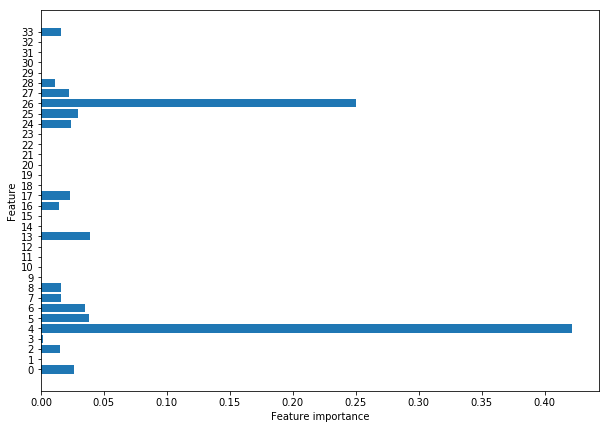

In [2]:
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# деревья решений
Tree = DecisionTreeClassifier(random_state = 1)
#Tree = DecisionTreeClassifier(random_state = 1, max_features=16, max_depth=7, min_samples_leaf=7)
Tree.fit(X_train, y_train)
print("Tree.score train: {:.2f}%".format(Tree.score(X_train, y_train)*100))
print("Tree.score test: {:.2f}%\n".format(Tree.score(X_test, y_test)*100))

# важность признаков
plt.figure(figsize=(10,7))
plt.barh(range(34), Tree.feature_importances_, align='center')
plt.yticks(np.arange(34), np.arange(34))
plt.xlabel("Feature importance")
plt.ylabel("Featurе")

# ансамбль деревьев
params = ['train_score', 'test_score', 'n_trees', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf']
resuts = []
def add_results(forest):
    resuts.append([forest.score(X_train, y_train)*100,  
                   forest.score(X_test, y_test)*100,
                   forest.n_estimators,
                   forest.max_depth,
                   forest.max_leaf_nodes,
                   forest.min_samples_leaf])
    
def my_forest(n_trees, max_dept, max_leaf_node, min_sample_leaf):
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth=max_dept, max_leaf_nodes=max_leaf_node, min_samples_leaf=min_sample_leaf, random_state=1)
    forest.fit(X_train, y_train)
    add_results(forest)
    return forest
    
forest0 = my_forest(n_trees = 7, max_dept=10, max_leaf_node=100, min_sample_leaf=1)
forest1 = my_forest(n_trees = 7, max_dept=10, max_leaf_node=100, min_sample_leaf=3)
forest2 = my_forest(n_trees = 7, max_dept=10, max_leaf_node=100, min_sample_leaf=5)
forest3 = my_forest(n_trees = 7, max_dept=10, max_leaf_node=100, min_sample_leaf=6)
forest4 = my_forest(n_trees = 7, max_dept=10, max_leaf_node=100, min_sample_leaf=7)
forest5 = my_forest(n_trees = 50, max_dept=3, max_leaf_node=10, min_sample_leaf=8)
    
np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)


Mlp.score train: 100.00%
Mlp.score test: 93.18%



,train_score,test_score,activation,alpha,max_iter,hidden_layer_sizes,n_hidden_layers
0,99.619772,92.045455,relu,1,50,"[8, 8, 8]",3
1,99.619772,90.909091,tanh,1,50,"[8, 8, 8]",3
2,96.577947,82.954545,identity,1,50,"[8, 8, 8]",3
3,64.258555,63.636364,logistic,1,70,"[8, 8, 8]",3


Text(0, 0.5, 'relu(x), tanh(x)')

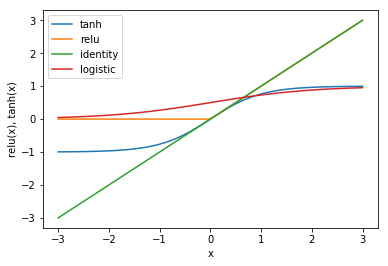

In [4]:
# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver="lbfgs", random_state = 1).fit(X_train, y_train)
print("Mlp.score train: {:.2f}%".format(mlp.score(X_train, y_train)*100))
print("Mlp.score test: {:.2f}%\n".format(mlp.score(X_test, y_test)*100))
    
params2 = ['train_score', 'test_score', 'activation', 'alpha', 'max_iter', 'hidden_layer_sizes',  'n_hidden_layers']
resuts2 = []
def add_results2(mlp, n_hidden_levels):
    resuts2.append([mlp.score(X_train, y_train)*100,
                  mlp.score(X_test, y_test)*100,
                  mlp.activation,
                  mlp.alpha,
                  mlp.max_iter,
                  mlp.hidden_layer_sizes,
                  n_hidden_levels])
           
from sklearn.neural_network import MLPClassifier
def my_mlp(activation, alpha, max_iter, hidden_layer_sizes):
    mlp = MLPClassifier(solver="lbfgs", random_state = 1, activation=activation, alpha=alpha, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes).fit(X_train, y_train)
    add_results2(mlp, np.array(hidden_layer_sizes).shape[0])
    return mlp
           
mlp0 = my_mlp(activation='relu', alpha=1, max_iter=50, hidden_layer_sizes=[8,8,8])
mlp1 = my_mlp(activation='tanh', alpha=1, max_iter=50, hidden_layer_sizes=[8,8,8])
mlp2 = my_mlp(activation='identity', alpha=1, max_iter=50, hidden_layer_sizes=[8,8,8])
mlp3 = my_mlp(activation='logistic', alpha=1, max_iter=70, hidden_layer_sizes=[8,8,8])
data_pd2 = pd.DataFrame(resuts2)
data_pd2.columns = params2
display(data_pd2)


# Функции активации
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line,0), label="relu")
plt.plot(line, line, label="identity")
plt.plot(line, 1/(1 + np.exp(-line)), label="logistic")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
# plt.savefig("figure.png")

Tree.score train: 97.34%
Tree.score test: 89.77%

Результаты леса:


,train_score,test_score,n_trees,max_depth,max_leaf_nodes,min_samples_leaf
0,91.254753,89.772727,5.0,6.0,10.0,7.0


,g,b
0,0.95,0.05
1,0.98,0.02
2,0.95,0.05
3,0.17,0.83
4,0.00,1.00
5,0.99,0.01


Text(0, 0.5, 'Признак 26')

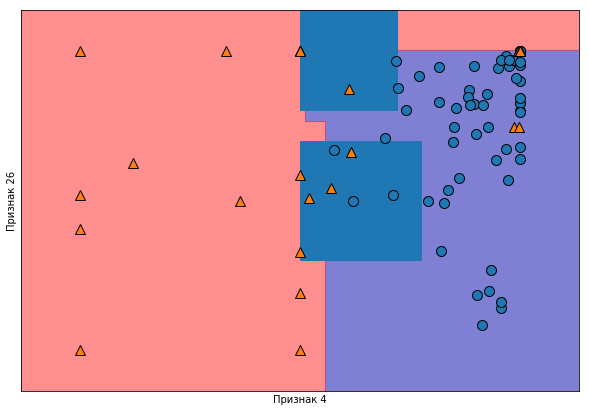

In [7]:
# деревья и лес с 2-мя признаками

from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
#X = data[:, :34]
X = data[:, [4,26]]
#print(X)
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# деревья решений
Tree = DecisionTreeClassifier(random_state = 1)
Tree.fit(X_train, y_train)
print("Tree.score train: {:.2f}%".format(Tree.score(X_train, y_train)*100))
print("Tree.score test: {:.2f}%\n".format(Tree.score(X_test, y_test)*100))

# важность признаков
plt.figure(figsize=(10,7))
plt.barh(range(2), Tree.feature_importances_, align='center')
plt.yticks(np.arange(2), np.arange(2))
plt.xlabel("Feature importance")
plt.ylabel("Feature")


# ансамбль деревьев
params = ['train_score', 'test_score', 'n_trees', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf']
resuts = []
def add_results(forest):
    resuts.append([forest.score(X_train, y_train)*100,  
                   forest.score(X_test, y_test)*100,
                   forest.n_estimators,
                   forest.max_depth,
                   forest.max_leaf_nodes,
                   forest.min_samples_leaf])
    
def my_forest(n_trees, max_dept, max_leaf_node, min_sample_leaf):
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth=max_dept, max_leaf_nodes=max_leaf_node, min_samples_leaf=min_sample_leaf, random_state=1)
    forest.fit(X_train, y_train)
    add_results(forest)
    return forest
    
forest5 = my_forest(n_trees = 5, max_dept=6, max_leaf_node=10, min_sample_leaf=7)
    
np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
print("Результаты леса:")
display(data_pd)

np_resuts = np.array(np.around(forest5.predict_proba(X_test[:6]), decimals=2))
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = ['g','b']
display(data_pd)

mglearn.plots.plot_2d_separator(forest5, X_test, fill = True, alpha = 0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.xlabel("Признак 4")
plt.ylabel("Признак 26")

Mlp.score train: 90.87%
Mlp.score test: 88.64%



,train_score,test_score,activation,alpha,max_iter,hidden_layer_sizes,n_hidden_layers
0,90.114068,90.909091,tanh,1,50,"[2, 4]",2


,g,b
0,0.99,0.01
1,0.94,0.06
2,0.99,0.01
3,0.25,0.75
4,0.00,1.00
5,0.99,0.01


Text(0, 0.5, 'Признак 26')

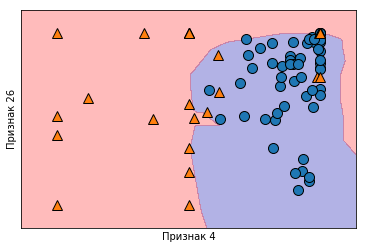

In [254]:
# MLP 2 признака
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver="lbfgs", random_state = 1).fit(X_train, y_train)
print("Mlp.score train: {:.2f}%".format(mlp.score(X_train, y_train)*100))
print("Mlp.score test: {:.2f}%\n".format(mlp.score(X_test, y_test)*100))

    
params2 = ['train_score', 'test_score', 'activation', 'alpha', 'max_iter', 'hidden_layer_sizes',  'n_hidden_layers']
resuts2 = []
def add_results2(mlp, n_hidden_levels):
    resuts2.append([mlp.score(X_train, y_train)*100,
                  mlp.score(X_test, y_test)*100,
                  mlp.activation,
                  mlp.alpha,
                  mlp.max_iter,
                  mlp.hidden_layer_sizes,
                  n_hidden_levels])
           
from sklearn.neural_network import MLPClassifier
def my_mlp(activation, alpha, max_iter, hidden_layer_sizes):
    mlp = MLPClassifier(solver="lbfgs", random_state = 1, activation=activation, alpha=alpha, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes).fit(X_train, y_train)
    add_results2(mlp, np.array(hidden_layer_sizes).shape[0])
    return mlp
           

mlp1 = my_mlp(activation='tanh', alpha=1, max_iter=50, hidden_layer_sizes=[2,4])

data_pd2 = pd.DataFrame(resuts2)
data_pd2.columns = params2
display(data_pd2)

np_resuts = np.array(np.around(mlp.predict_proba(X_test[:6]), decimals=2))
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = ['g','b']
display(data_pd)

mglearn.plots.plot_2d_separator(mlp, X_test, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_test[:,0],X_test[:,1], y_test)
plt.xlabel("Признак 4")
plt.ylabel("Признак 26")